### Simulate the Monty Hall Problem

- Simulate three doors, one car, and two goats.
 - Simulate three players: the switcher, the conservative, and the newcomer. 
 - Record who wins.
 - Repeat it many times.
 - Which player do you want to be?
 
 - What would happen if you had 100 doors to choose from and the presenter opens 98 or them?
 
- And what if you had $N$ doors to choose from and the presenter opens $M\leq N-2$ of them? Study how the probability of winning changes as a function of $M$ and $N$.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import argparse

In [6]:
N_doors = 100
win_count_s = 0
win_count_c = 0
win_count_n = 0
tot_choices = 0

In [7]:
#Generate the prizes

prize = ["Car"]

for i in range(0, N_doors - 1):
    prize.append("Goat")

In [8]:
#Run the code many times

for i in range(0, 1000):
    door = np.random.choice(prize, N_doors, replace=False)
    
    #Generate a choice for the switcher and conservative
    
    choice = door[np.random.randint(0, N_doors)]
    
    #Generate a choice for the newcomer
    
    new_door = np.random.choice(["Car", "Goat"], 2, replace=False)
    new_choice = new_door[np.random.randint(0, 2)]
    
    #The switcher loses if the first choice is a car, while the conservative wins
    
    if choice == "Car":
        win_count_c += 1
    
    if choice == "Goat":
        win_count_s += 1
        
    if new_choice == "Car":
        win_count_n += 1
        
    tot_choices += 1
    
    
#Probability computation
    
p_s = win_count_s / tot_choices
p_c = win_count_c / tot_choices
p_n = win_count_n / tot_choices
probs = [p_s, p_c, p_n]

Switcher = 0.987
Conservative = 0.013
Newcomer = 0.488


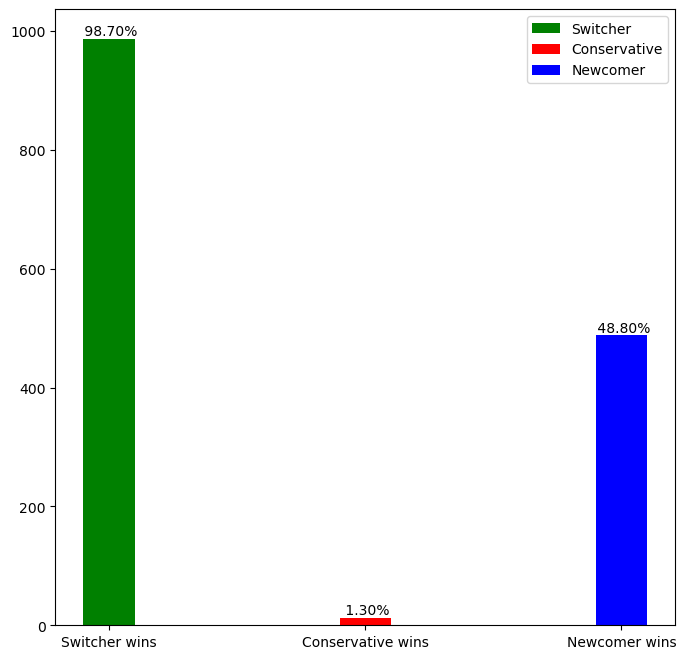

In [9]:
#Draw an histogram with the probabilities
    
print("Switcher = " + str(p_s)) 
print("Conservative = " + str(p_c))   
print("Newcomer = " + str(p_n))      
    
plt.figure(figsize=(8, 8))
bar = plt.bar(["Switcher wins", "Conservative wins", "Newcomer wins"], height=[win_count_s, win_count_c, win_count_n], width=0.2, color=["green", "red", "blue"], label=["Switcher", "Conservative", "Newcomer"])
plt.xticks()
plt.yticks()
plt.legend(prop={"size": 10})

bar_i = 0

for rect in bar:
    height = rect.get_height()
    plt.text(rect.get_x() + rect.get_width() / 2.0, height, f"{probs[bar_i]: .2%}", ha='center', va='bottom', size=10)
    bar_i += 1